<a href="https://colab.research.google.com/github/harsh15061999/NFT-Sales-Analysis/blob/main/NFT_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analytics of NFT'S Collections**


Introduction:

This data has information about the top 250 NFT collections in the word
- Columns ( Collections, Sales, Buyers, Txns, Owners)
- link to the sites where I got this data: https://www.kaggle.com/hemil26/nft-collections-dataset

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [7]:
from google.colab import files
uploaded = files.upload()

Saving nft_sales.csv to nft_sales (1).csv


In [11]:
df = pd.read_csv('nft_sales.csv')
print(df.head())
print(df.info())

             Collections           Sales     Buyers        Txns     Owners
0          Axie Infinity  $4,074,436,593  1,758,089  16,425,913  2,421,759
1            CryptoPunks  $2,265,241,216      5,681      21,287      3,711
2   Bored Ape Yacht Club  $2,221,448,934     11,449      29,835        NaN
3  Mutant Ape Yacht Club  $1,566,494,617     21,581      40,202        NaN
4             Art Blocks  $1,265,723,876     30,142     161,629     34,392
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Collections  250 non-null    object
 1   Sales        250 non-null    object
 2   Buyers       250 non-null    object
 3   Txns         250 non-null    object
 4   Owners       114 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB
None


In [12]:
print(f'Quantity of lines: {df.shape[0]}\nQuantity of Columns: {df.shape[1]}')

Quantity of lines: 250
Quantity of Columns: 5


In [14]:
nft_collections = df.dropna()
nft_collections

,Collections,Sales,Buyers,Txns,Owners
0,Axie Infinity,"$4,074,436,593","1,758,089","16,425,913","2,421,759"
1,CryptoPunks,"$2,265,241,216","5,681","21,287","3,711"
4,Art Blocks,"$1,265,723,876","30,142","161,629","34,392"
5,NBA Top Shot,"$1,010,518,586","441,331","20,508,086","694,627"
13,The Sandbox,"$371,134,354","25,051","55,929","19,033"
...,...,...,...,...,...
237,Space Punks Club,"$20,649,569","6,174","14,016","4,307"
241,Gods Unchained,"$20,280,023","3,576","386,409","15,272"
242,DystoPunks V2,"$20,247,979","1,326","3,169",673
245,Wool Pouch,"$19,972,856","2,043","5,349","3,272"


In [ ]:
nft_collections.rename(columns = {'Txns': 'Transactions'}, inplace = True)
nft_collections['Sales'] =  nft_collections['Sales'].str.replace('$', '')
nft_collections['Sales'] =  nft_collections['Sales'].str.replace(',', '')
nft_collections['Buyers'] = nft_collections['Buyers'].str.replace(',','')
nft_collections['Transactions'] =  nft_collections['Transactions'] .str.replace(',','')
nft_collections['Owners'] =  nft_collections['Owners'].str.replace(',','')

warnings.filterwarnings('ignore')
nft_collections

In [16]:
nft_collections['Sales'] = nft_collections['Sales'].astype('int64')
nft_collections['Buyers'] = nft_collections['Buyers'].astype('int64')
nft_collections['Transactions'] = nft_collections['Transactions'].astype('int64')
nft_collections['Owners'] = nft_collections['Owners'].astype('int64')
nft_collections

,Collections,Sales,Buyers,Transactions,Owners
0,Axie Infinity,4074436593,1758089,16425913,2421759
1,CryptoPunks,2265241216,5681,21287,3711
4,Art Blocks,1265723876,30142,161629,34392
5,NBA Top Shot,1010518586,441331,20508086,694627
13,The Sandbox,371134354,25051,55929,19033
...,...,...,...,...,...
237,Space Punks Club,20649569,6174,14016,4307
241,Gods Unchained,20280023,3576,386409,15272
242,DystoPunks V2,20247979,1326,3169,673
245,Wool Pouch,19972856,2043,5349,3272


In [17]:
sum_sales = nft_collections['Sales'].sum()
sum_sales = f'U${sum_sales:_.0f}'
sum_sales = sum_sales.replace('_','.')

sum_buyers = nft_collections['Buyers'].sum()
sum_buyers = f'{sum_buyers:_.0f}'
sum_buyers = sum_buyers.replace('_','.')

sum_transactions = nft_collections['Transactions'].sum()
sum_transactions = f'{sum_transactions:_.0f}'
sum_transactions = sum_transactions.replace('_','.')

sum_Owners = nft_collections['Owners'].sum()
sum_Owners = f'{sum_Owners:_.0f}'
sum_Owners = sum_Owners.replace('_','.')

print(f'Sales in Dollar = {sum_sales}')
print(f'Quantity of Buyers Total = {sum_buyers}')
print(f'Quantity of Transactions Total = {sum_transactions}')
print(f'Quantity of Owners Total = {sum_Owners}')

Sales in Dollar = U$15.662.226.598
Quantity of Buyers Total = 3.871.272
Quantity of Transactions Total = 61.911.965
Quantity of Owners Total = 8.330.087


In [19]:
nft_collections.describe()

,Sales,Buyers,Transactions,Owners
count,1.140000e+02,1.140000e+02,1.140000e+02,1.140000e+02
mean,1.373880e+08,3.395853e+04,5.430874e+05,7.307094e+04
std,4.515023e+08,1.741527e+05,2.584033e+06,4.017253e+05
min,1.970062e+07,1.010000e+02,1.490000e+02,1.000000e+00
25%,2.677956e+07,4.407000e+03,1.069300e+04,2.830750e+03
50%,4.307028e+07,6.793000e+03,1.627750e+04,4.186000e+03
75%,9.011547e+07,9.223000e+03,2.376650e+04,5.641500e+03
max,4.074437e+09,1.758089e+06,2.050809e+07,3.488589e+06


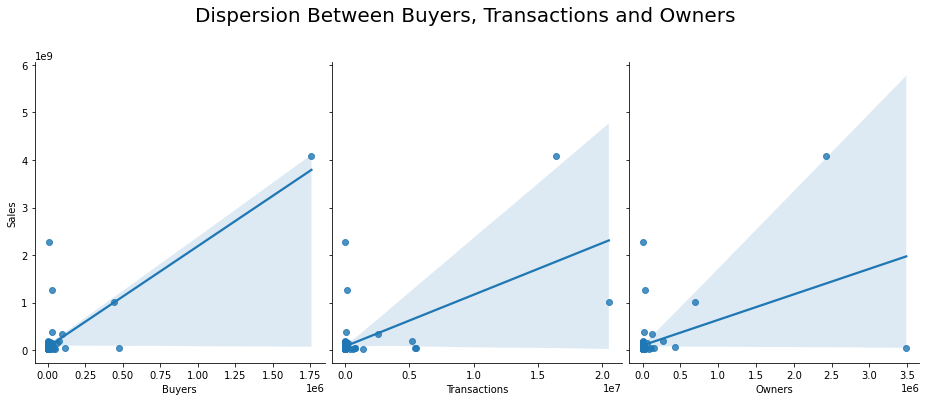

In [20]:
ax = sns.pairplot(nft_collections, y_vars='Sales', x_vars=['Buyers','Transactions','Owners'], kind='reg',height=5)
ax.figure.set_size_inches(13,5)
ax.fig.suptitle('Dispersion Between Buyers, Transactions and Owners', fontsize=20, y=1.1)
ax

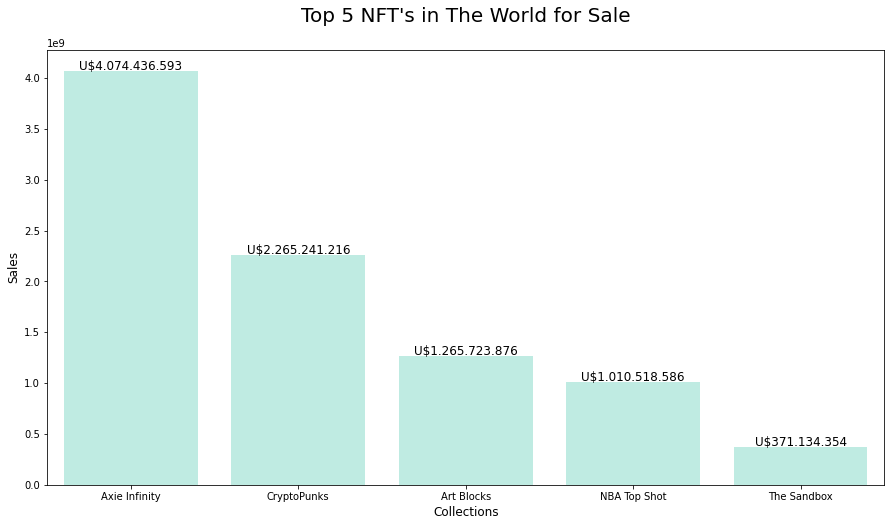

In [24]:
sales = sns.barplot(x="Collections", y="Sales",color='#b8f2e6', data=nft_collections.nlargest(5, 'Sales'))

for i in sales.patches:

    sales.annotate('U${:,.0f}'.format(i.get_height()).replace(',','.'),
                 (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=12, color='black', xytext=(0,1), textcoords='offset points')

sales.figure.set_size_inches(15,8)
sales.set_title("Top 5 NFT's in The World for Sale", fontsize=20, y=1.05)
sales.xaxis.label.set_size(12)
sales.yaxis.label.set_size(12)

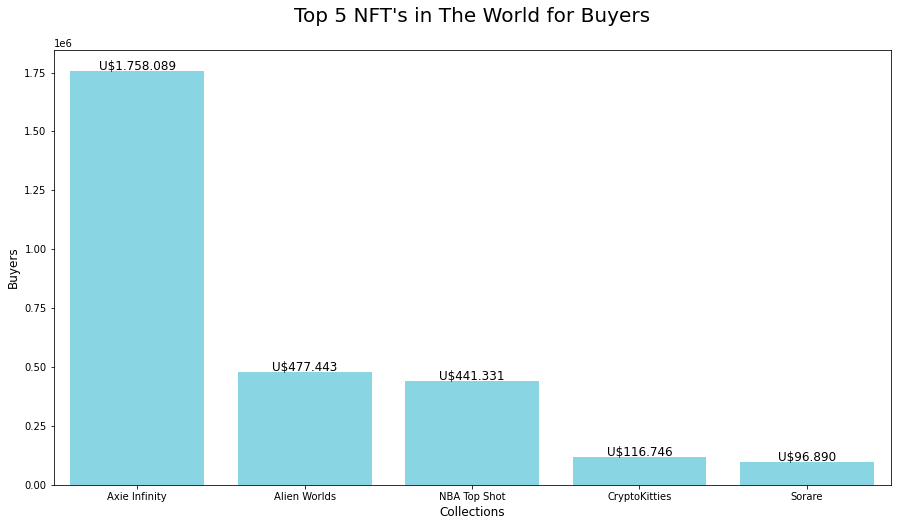

In [27]:
Buyers = sns.barplot(x="Collections", y="Buyers",color='#7bdff2', data=nft_collections.nlargest(5, 'Buyers'))

for i in Buyers.patches:

    Buyers.annotate('U${:,.0f}'.format(i.get_height()).replace(',','.'),
                 (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=12, color='black', xytext=(0,1), textcoords='offset points')

Buyers.figure.set_size_inches(15,8)
Buyers.set_title("Top 5 NFT's in The World for Buyers", fontsize=20, y=1.05)
Buyers.xaxis.label.set_size(12)
Buyers.yaxis.label.set_size(12)

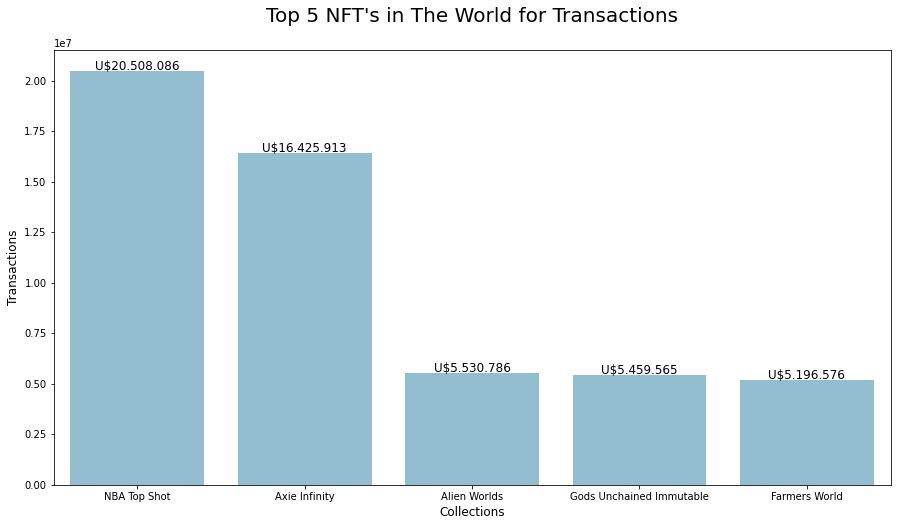

In [26]:
Transactions = sns.barplot(x="Collections", y="Transactions",color='#89c2d9', 
                           data=nft_collections.nlargest(5, 'Transactions'))

for i in Transactions.patches:
    Transactions.annotate('U${:,.0f}'.format(i.get_height()).replace(',','.'),
                (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=12, color='black', xytext=(0,1), textcoords='offset points')
     
Transactions.figure.set_size_inches(15,8)
Transactions.set_title("Top 5 NFT's in The World for Transactions", fontsize=20, y=1.05 )
Transactions.xaxis.label.set_size(12)
Transactions.yaxis.label.set_size(12)

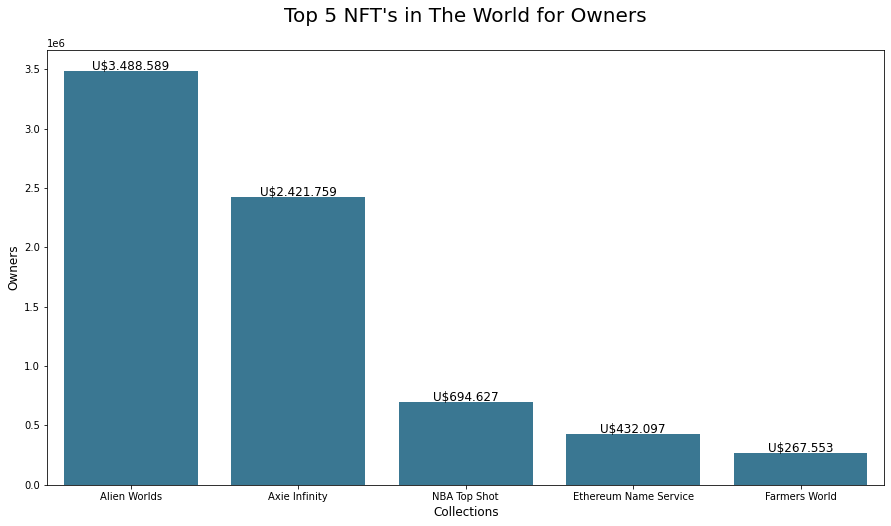

In [29]:
Owners = sns.barplot(x="Collections", y="Owners", color='#2c7da0',data=nft_collections.nlargest(5, 'Owners'))

for i in Owners.patches:
    Owners.annotate('U${:,.0f}'.format(i.get_height()).replace(',','.'),

                 (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=12, color='black', xytext=(0,1), textcoords='offset points')
    
Owners.figure.set_size_inches(15,8)
Owners.set_title("Top 5 NFT's in The World for Owners", fontsize=20, y=1.05)
Owners.xaxis.label.set_size(12)
Owners.yaxis.label.set_size(12)

In [30]:
nft_collections['Sales Greater than 500.000.000'] = np.where(nft_collections['Sales']>=500000000, 'Yes', 'No')
nft_collections.head()

,Collections,Sales,Buyers,Transactions,Owners,Sales Greater than 500.000.000
0,Axie Infinity,4074436593,1758089,16425913,2421759,Yes
1,CryptoPunks,2265241216,5681,21287,3711,Yes
4,Art Blocks,1265723876,30142,161629,34392,Yes
5,NBA Top Shot,1010518586,441331,20508086,694627,Yes
13,The Sandbox,371134354,25051,55929,19033,No


In [31]:
sum_sales_than_500000000= nft_collections.groupby('Sales Greater than 500.000.000').sum()
print(format(sum_sales_than_500000000))

                                     Sales   Buyers  Transactions   Owners
Sales Greater than 500.000.000                                            
No                              7046306327  1636029      24795050  5175598
Yes                             8615920271  2235243      37116915  3154489


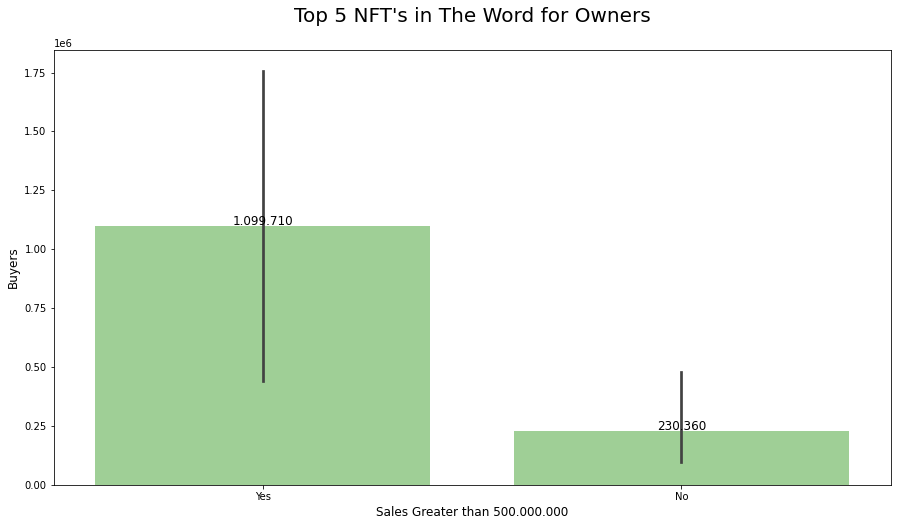

In [32]:
""" Based on these data, we can analyze that most buyers are investing their money
    in companies that have already made more than 500,000,000 dollars.
"""

sales_greater_than_500000000 = sns.barplot(x="Sales Greater than 500.000.000", y="Buyers", color="#99d98c", data=nft_collections.nlargest(5, 'Buyers'))
sales_greater_than_500000000.figure.set_size_inches(15,8)

for i in sales_greater_than_500000000.patches:
    sales_greater_than_500000000.annotate('{:,.0f}'.format(i.get_height()).replace(',','.'),
                 (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center', va='baseline', fontsize=12, color='black', xytext=(0,1), textcoords='offset points')
    
    
sales_greater_than_500000000.set_title("Top 5 NFT's in The World for Owners", fontsize=20, y=1.05)
sales_greater_than_500000000.xaxis.label.set_size(12)
sales_greater_than_500000000.yaxis.label.set_size(12)

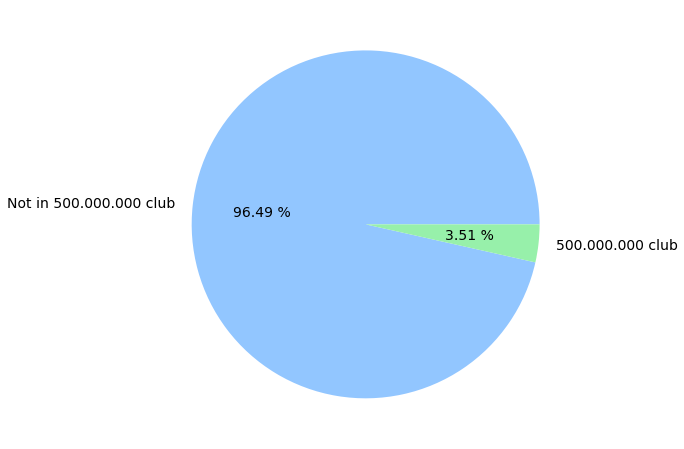

In [33]:
# At this time, I will analyze the representativeness about nft's that the value in sales in more than 500.000.000.

percent_nft_large_than_500000000 = nft_collections.groupby(['Sales Greater than 500.000.000']).count()['Collections']
labels = ["Not in 500.000.000 club","500.000.000 club"]
plt.style.use('seaborn-pastel')
plt.figure(figsize=(10,8))
plt.pie(percent_nft_large_than_500000000,labels=labels,autopct='%.2f %%',textprops={'fontsize': 14})
plt.show()

In [35]:
 ###For create a ABC is necessary create a percent about this sales and a percent accumulated and a rule about ABC.

""" This Rules about ABC is:
    A <= 0.8
    B <= 0.95
    C <= 1.00 """

nft_collections['percent_sales'] = nft_collections['Sales'] / nft_collections['Sales'].sum()
nft_collections['Acumulated_sales'] = nft_collections['percent_sales'].cumsum()

nft_collections['ABC'] = ['A' if i <= 0.8 else 'B' if i<0.95 else 'C' for i in nft_collections['Acumulated_sales']]

nft_collections

,Collections,Sales,Buyers,Transactions,Owners,Sales Greater than 500.000.000,percent_sales,Acumulated_sales,ABC
0,Axie Infinity,4074436593,1758089,16425913,2421759,Yes,0.260144,0.260144,A
1,CryptoPunks,2265241216,5681,21287,3711,Yes,0.144631,0.404775,A
4,Art Blocks,1265723876,30142,161629,34392,Yes,0.080814,0.485589,A
5,NBA Top Shot,1010518586,441331,20508086,694627,Yes,0.064519,0.550108,A
13,The Sandbox,371134354,25051,55929,19033,No,0.023696,0.573804,A
...,...,...,...,...,...,...,...,...,...
237,Space Punks Club,20649569,6174,14016,4307,No,0.001318,0.994879,C
241,Gods Unchained,20280023,3576,386409,15272,No,0.001295,0.996174,C
242,DystoPunks V2,20247979,1326,3169,673,No,0.001293,0.997467,C
245,Wool Pouch,19972856,2043,5349,3272,No,0.001275,0.998742,C


NameError: ignored

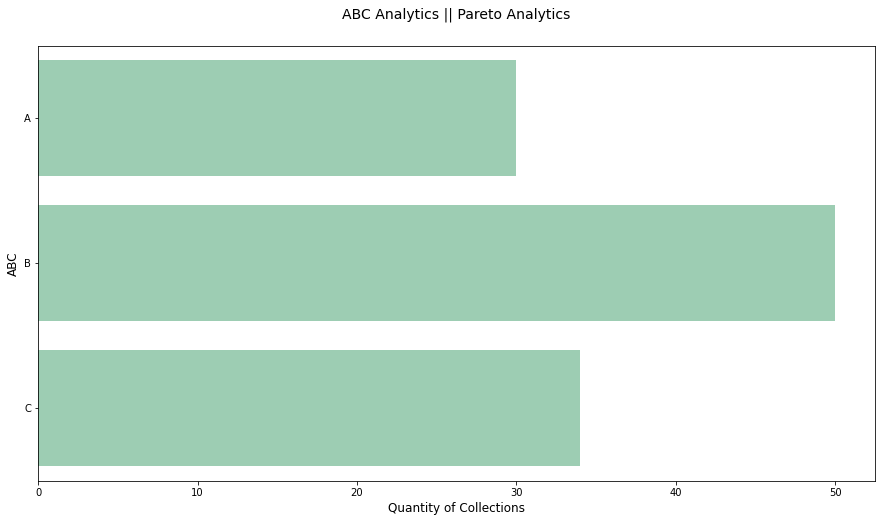

In [36]:
ax = plt.subplots(figsize=(15, 8))    
    
ax = sns.countplot(y="ABC", data=nft_collections, color="#95d5b2")
ax.set_ylabel("ABC", fontsize = 12)
ax.set_xlabel("Quantity of Collections", fontsize = 12)
ax.set_title("ABC Analytics || Pareto Analytics", fontsize = 14, y=1.05)
Text(0.5, 1.05, 'ABC Analytics || Pareto Analytics')